In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
houses = pd.read_csv('dataset/houses_to_rent_v2_cleaned.csv')

In [3]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [4]:
Y = houses.rent_amount
X = houses.drop(columns=['rent_amount'],axis=1)

In [5]:
model = sm.OLS(Y,add_constant(X))
model_fit = model.fit()

In [6]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.214e+08
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        17:47:32   Log-Likelihood:                -34524.
No. Observations:               10692   AIC:                         6.908e+04
Df Residuals:                   10676   BIC:                         6.920e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3121      0.256     -1.219      0.223      -0.814       0.190
area           -2.617e-05      0.000     -0.231      0.818      -0.000       0.000
rooms              0.0763      0.080      0.953      0.341      -0.081       0.233
bathroom          -0.0326      0.076     -0.432      0.666      -0.181       0.116
parking_spaces     0.0133      0.056      0.237      0.812      -0.096       0.123
floor              0.0167      0.011      1.575      0.115      -0.004       0.037
animal            -0.1797      0.146     -1.230      0.219      -0.466       0.107
furniture          0.1420      0.144      0.984      0.325      -0.141       0.425
hoa               -1.0000      0.000  -7889.804      0.000      -1.000      -1.000
property_tax      -0.9998      0.000  -7795.035      0.000      -1.000      -1.000
fire_insurance    -0.9923      0.009   -108.280      0.000      -1.010      -0.974
total              0.9999      0.000   7903.005      0.000       1.000       1.000
Campinas           0.3276      0.275      1.189      0.234      -0.212       0.868
Porto Alegre       0.2891      0.254      1.136      0.256      -0.210       0.788
Rio de Janeiro     0.3785      0.244      1.553      0.120      -0.099       0.856
São Paulo          0.1065      0.199      0.535      0.593      -0.284       0.497
==============================================================================
Omnibus:                    34272.308   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3983983574.667
Skew:                         -52.672   Prob(JB):                         0.00
Kurtosis:                    2991.583   Cond. No.                     1.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# we don't have a good model.
# we remove columns that are closely related to rent_amount like the total and additionnal fees

In [8]:
def remove_col(col_name,data):
    # drop the column
    if col_name:
        data=data.drop(col_name,axis=1)
    # build the new model without this column
    model = sm.OLS(Y,add_constant(data))
    # fit it
    model_fit = model.fit()
    # display the model summary
    display(model_fit.summary())
    # return the X without the column
    return data

In [9]:
X = remove_col('total',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.979e+04
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        17:47:33   Log-Likelihood:                -80898.
No. Observations:               10692   AIC:                         1.618e+05
Df Residuals:                   10677   BIC:                         1.619e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -144.5219     19.535     -7.398      0.000    -182.814    -106.230
area              -0.0166      0.009     -1.909      0.056      -0.034       0.000
rooms            -34.0436      6.111     -5.570      0.000     -46.023     -22.064
bathroom          46.9625      5.767      8.144      0.000      35.659      58.266
parking_spaces   -34.2780      4.268     -8.032      0.000     -42.644     -25.912
floor             29.1201      0.758     38.399      0.000      27.634      30.607
animal           -30.5137     11.169     -2.732      0.006     -52.408      -8.620
furniture        124.5865     10.970     11.357      0.000     103.083     146.090
hoa                0.0012      0.000      4.194      0.000       0.001       0.002
property_tax       0.0024      0.001      1.669      0.095      -0.000       0.005
fire_insurance    70.0178      0.138    508.415      0.000      69.748      70.288
Campinas         167.6938     21.007      7.983      0.000     126.516     208.871
Porto Alegre    -161.5131     19.398     -8.326      0.000    -199.536    -123.490
Rio de Janeiro   259.9826     18.471     14.075      0.000     223.775     296.190
São Paulo        287.4303     14.969     19.201      0.000     258.087     316.773
==============================================================================
Omnibus:                     5203.948   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1040872.346
Skew:                           1.216   Prob(JB):                         0.00
Kurtosis:                      51.275   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
X = remove_col('property_tax',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 4.284e+04
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        17:47:33   Log-Likelihood:                -80899.
No. Observations:               10692   AIC:                         1.618e+05
Df Residuals:                   10678   BIC:                         1.619e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -144.8575     19.535     -7.415      0.000    -183.151    -106.565
area              -0.0164      0.009     -1.887      0.059      -0.033       0.001
rooms            -34.1780      6.111     -5.592      0.000     -46.157     -22.198
bathroom          47.2945      5.764      8.205      0.000      35.996      58.593
parking_spaces   -34.0987      4.267     -7.992      0.000     -42.462     -25.735
floor             29.1317      0.758     38.413      0.000      27.645      30.618
animal           -30.8162     11.169     -2.759      0.006     -52.709      -8.923
furniture        124.3414     10.970     11.335      0.000     102.838     145.845
hoa                0.0012      0.000      4.197      0.000       0.001       0.002
fire_insurance    70.0259      0.138    508.743      0.000      69.756      70.296
Campinas         167.7173     21.009      7.983      0.000     126.536     208.898
Porto Alegre    -161.3854     19.399     -8.319      0.000    -199.411    -123.360
Rio de Janeiro   260.4167     18.471     14.099      0.000     224.210     296.624
São Paulo        287.8642     14.968     19.231      0.000     258.523     317.205
==============================================================================
Omnibus:                     5201.066   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1040257.225
Skew:                           1.214   Prob(JB):                         0.00
Kurtosis:                      51.261   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X = remove_col('hoa',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 4.634e+04
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        17:47:33   Log-Likelihood:                -80908.
No. Observations:               10692   AIC:                         1.618e+05
Df Residuals:                   10679   BIC:                         1.619e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -141.5758     19.535     -7.247      0.000    -179.868    -103.284
area              -0.0165      0.009     -1.896      0.058      -0.033       0.001
rooms            -35.1811      6.112     -5.757      0.000     -47.161     -23.201
bathroom          48.8847      5.756      8.493      0.000      37.602      60.167
parking_spaces   -34.5793      4.269     -8.101      0.000     -42.946     -26.212
floor             29.1816      0.759     38.454      0.000      27.694      30.669
animal           -31.7304     11.175     -2.839      0.005     -53.636      -9.824
furniture        124.0801     10.978     11.302      0.000     102.561     145.600
fire_insurance    70.0305      0.138    508.398      0.000      69.760      70.300
Campinas         165.6242     21.019      7.880      0.000     124.423     206.825
Porto Alegre    -163.6760     19.406     -8.434      0.000    -201.716    -125.636
Rio de Janeiro   258.6258     18.481     13.994      0.000     222.400     294.851
São Paulo        285.7688     14.972     19.087      0.000     256.421     315.116
==============================================================================
Omnibus:                     5193.237   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1036881.617
Skew:                           1.211   Prob(JB):                         0.00
Kurtosis:                      51.183   Cond. No.                     4.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X = remove_col('fire_insurance',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1073.
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        17:47:34   Log-Likelihood:                -98159.
No. Observations:               10692   AIC:                         1.963e+05
Df Residuals:                   10680   BIC:                         1.964e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -944.0380     97.746     -9.658      0.000   -1135.638    -752.438
area               0.1461      0.044      3.355      0.001       0.061       0.231
rooms            368.3705     30.420     12.109      0.000     308.741     428.000
bathroom         993.0794     27.349     36.311      0.000     939.470    1046.689
parking_spaces   441.3888     20.906     21.113      0.000     400.408     482.369
floor             30.1874      3.810      7.924      0.000      22.720      37.655
animal           -87.0827     56.099     -1.552      0.121    -197.047      22.882
furniture       1167.7473     54.140     21.569      0.000    1061.623    1273.871
Campinas        -424.0533    105.356     -4.025      0.000    -630.571    -217.536
Porto Alegre     -54.1543     97.416     -0.556      0.578    -245.107     136.798
Rio de Janeiro   858.0593     92.585      9.268      0.000     676.576    1039.543
São Paulo        932.1869     74.888     12.448      0.000     785.393    1078.981
==============================================================================
Omnibus:                     4341.262   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42402.372
Skew:                           1.678   Prob(JB):                         0.00
Kurtosis:                      12.160   Cond. No.                     4.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X = remove_col('animal',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1180.
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        17:47:34   Log-Likelihood:                -98161.
No. Observations:               10692   AIC:                         1.963e+05
Df Residuals:                   10681   BIC:                         1.964e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -992.3232     92.671    -10.708      0.000   -1173.975    -810.672
area               0.1456      0.044      3.342      0.001       0.060       0.231
rooms            363.2175     30.241     12.011      0.000     303.940     422.495
bathroom         993.9024     27.346     36.346      0.000     940.300    1047.505
parking_spaces   439.7028     20.880     21.059      0.000     398.775     480.631
floor             30.1608      3.810      7.917      0.000      22.693      37.629
furniture       1174.3903     53.974     21.758      0.000    1068.591    1280.189
Campinas        -434.0451    105.166     -4.127      0.000    -640.191    -227.900
Porto Alegre     -69.4746     96.921     -0.717      0.474    -259.457     120.508
Rio de Janeiro   846.2044     92.275      9.170      0.000     665.328    1027.081
São Paulo        926.9281     74.816     12.389      0.000     780.275    1073.581
==============================================================================
Omnibus:                     4341.124   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42329.704
Skew:                           1.679   Prob(JB):                         0.00
Kurtosis:                      12.151   Cond. No.                     4.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Porto Alegre
X = remove_col('Porto Alegre',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1312.
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        17:47:35   Log-Likelihood:                -98161.
No. Observations:               10692   AIC:                         1.963e+05
Df Residuals:                   10682   BIC:                         1.964e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1032.0979     74.221    -13.906      0.000   -1177.584    -886.612
area               0.1460      0.044      3.353      0.001       0.061       0.231
rooms            365.7731     30.029     12.181      0.000     306.911     424.636
bathroom         993.0725     27.321     36.349      0.000     939.519    1046.626
parking_spaces   440.5159     20.848     21.130      0.000     399.649     481.382
floor             30.2139      3.809      7.932      0.000      22.748      37.680
furniture       1172.1704     53.884     21.754      0.000    1066.548    1277.793
Campinas        -399.9269     93.777     -4.265      0.000    -583.747    -216.107
Rio de Janeiro   881.3735     78.149     11.278      0.000     728.186    1034.561
São Paulo        960.9184     57.869     16.605      0.000     847.485    1074.352
==============================================================================
Omnibus:                     4341.605   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42325.268
Skew:                           1.679   Prob(JB):                         0.00
Kurtosis:                      12.150   Cond. No.                     2.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check the assumption multicolinearity:

In [15]:
model =sm.OLS(Y,add_constant(X))

In [16]:
model_fit = model.fit()

In [17]:
y_predict = model_fit.predict(add_constant(X))

In [18]:
df = pd.concat([Y,y_predict],axis=1)

In [19]:
df.columns=['RentPrice','PredictedRentPrice']

Text(0.5, 1.0, 'rent amount predicted')

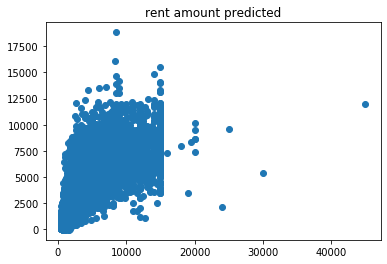

In [22]:
#sns.lmplot(x='RentPrice',y='PredictedRentPrice',data=df)
plt.scatter(Y,y_predict)
plt.title('rent amount predicted')

## Other way of modeling

In [67]:
houses = pd.read_csv('dataset/houses_to_rent_v2_cleaned.csv')
houses.corr()['rent_amount'].sort_values(ascending=False)

rent_amount       1.000000
fire_insurance    0.987343
bathroom          0.668504
parking_spaces    0.578361
rooms             0.541758
total             0.264490
São Paulo         0.245690
area              0.180742
furniture         0.164235
property_tax      0.107884
floor             0.073596
animal            0.067754
hoa               0.036490
Rio de Janeiro   -0.078650
Campinas         -0.132342
Porto Alegre     -0.162051
Name: rent_amount, dtype: float64

In [ ]:
# let's take only the most correlated variable with rent_amount
#rent_amount       1.000000
# fire_insurance    0.987343
# bathroom          0.668504
# parking_spaces    0.578361
# rooms             0.541758
# total             0.264490
# São Paulo         0.245690
# area              0.180742
# furniture         0.164235
# property_tax      0.107884
# Campinas         -0.132342
# Porto Alegre     -0.162051

In [68]:
Y = houses.rent_amount
X = houses[['fire_insurance','bathroom','parking_spaces','rooms','total','São Paulo','area','furniture','property_tax','Campinas','Porto Alegre']]

In [69]:
model = sm.OLS(Y,add_constant(X))

In [70]:
model_fit=model.fit()

In [71]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 4.367e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:13:09   Log-Likelihood:                -81674.
No. Observations:               10692   AIC:                         1.634e+05
Df Residuals:                   10680   BIC:                         1.635e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            151.7294     15.345      9.888      0.000     121.651     181.808
fire_insurance    69.9950      0.150    467.941      0.000      69.702      70.288
bathroom          61.9037      6.186     10.007      0.000      49.778      74.029
parking_spaces   -45.9100      4.532    -10.129      0.000     -54.794     -37.026
rooms            -63.9216      6.482     -9.862      0.000     -76.627     -51.216
total              0.0023      0.000      7.508      0.000       0.002       0.003
São Paulo        170.2414     11.980     14.211      0.000     146.759     193.724
area              -0.0213      0.009     -2.280      0.023      -0.040      -0.003
furniture        170.2400     11.704     14.545      0.000     147.298     193.182
property_tax       0.0010      0.002      0.594      0.553      -0.002       0.004
Campinas          19.4911     19.943      0.977      0.328     -19.601      58.583
Porto Alegre    -336.1446     17.560    -19.143      0.000    -370.565    -301.724
==============================================================================
Omnibus:                     4862.947   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           426024.827
Skew:                           1.274   Prob(JB):                         0.00
Kurtosis:                      33.819   Cond. No.                     8.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
X = remove_col('property_tax',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 4.804e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:13:10   Log-Likelihood:                -81675.
No. Observations:               10692   AIC:                         1.634e+05
Df Residuals:                   10681   BIC:                         1.635e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            151.5927     15.343      9.881      0.000     121.518     181.667
fire_insurance    69.9954      0.150    467.963      0.000      69.702      70.289
bathroom          61.9833      6.184     10.023      0.000      49.861      74.106
parking_spaces   -45.8358      4.531    -10.117      0.000     -54.717     -36.955
rooms            -63.9531      6.481     -9.867      0.000     -76.658     -51.248
total              0.0024      0.000      7.778      0.000       0.002       0.003
São Paulo        170.3468     11.978     14.222      0.000     146.868     193.826
area              -0.0212      0.009     -2.273      0.023      -0.039      -0.003
furniture        170.1657     11.703     14.540      0.000     147.225     193.106
Campinas          19.4421     19.942      0.975      0.330     -19.649      58.533
Porto Alegre    -336.1484     17.559    -19.143      0.000    -370.568    -301.729
==============================================================================
Omnibus:                     4860.678   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           426114.785
Skew:                           1.272   Prob(JB):                         0.00
Kurtosis:                      33.822   Cond. No.                     8.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
X = remove_col('Campinas',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 5.338e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:13:11   Log-Likelihood:                -81675.
No. Observations:               10692   AIC:                         1.634e+05
Df Residuals:                   10682   BIC:                         1.634e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            157.0278     14.294     10.986      0.000     129.009     185.046
fire_insurance    69.9818      0.149    469.905      0.000      69.690      70.274
bathroom          62.1595      6.182     10.055      0.000      50.042      74.277
parking_spaces   -45.3672      4.505    -10.070      0.000     -54.198     -36.537
rooms            -64.4019      6.465     -9.961      0.000     -77.075     -51.729
total              0.0024      0.000      7.763      0.000       0.002       0.003
São Paulo        165.7314     11.003     15.063      0.000     144.164     187.299
area              -0.0212      0.009     -2.273      0.023      -0.039      -0.003
furniture        169.7665     11.696     14.515      0.000     146.840     192.693
Porto Alegre    -340.8006     16.899    -20.167      0.000    -373.925    -307.676
==============================================================================
Omnibus:                     4858.346   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           425577.050
Skew:                           1.271   Prob(JB):                         0.00
Kurtosis:                      33.803   Cond. No.                     7.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
# adding iteratively the remaining features
# floor             0.073596
# animal            0.067754
# hoa               0.036490
# Rio de Janeiro   -0.078650

In [78]:
def add_col(col_name,data):
    if col_name:
        data[col_name]=houses[col_name]
        print(data.columns)
    model = sm.OLS(Y,add_constant(data))
    model_fit = model.fit()
    display(model_fit.summary())
    return data

In [79]:
X = add_col('floor',X)

Index(['fire_insurance', 'bathroom', 'parking_spaces', 'rooms', 'total',
       'São Paulo', 'area', 'furniture', 'Porto Alegre', 'floor'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 5.484e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:14:45   Log-Likelihood:                -80981.
No. Observations:               10692   AIC:                         1.620e+05
Df Residuals:                   10681   BIC:                         1.621e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6638     14.010     -0.047      0.962     -28.126      26.798
fire_insurance    69.9727      0.140    501.312      0.000      69.699      70.246
bathroom          49.2251      5.803      8.482      0.000      37.849      60.601
parking_spaces   -42.4073      4.223    -10.042      0.000     -50.685     -34.130
rooms            -42.7401      6.085     -7.023      0.000     -54.669     -30.812
total              0.0021      0.000      7.219      0.000       0.002       0.003
São Paulo        140.9169     10.332     13.639      0.000     120.664     161.170
area              -0.0184      0.009     -2.100      0.036      -0.035      -0.001
furniture        133.5016     11.002     12.134      0.000     111.935     155.068
Porto Alegre    -314.7404     15.852    -19.855      0.000    -345.814    -283.667
floor             29.3804      0.764     38.468      0.000      27.883      30.878
==============================================================================
Omnibus:                     4954.182   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1056511.671
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                      51.650   Cond. No.                     7.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
X = add_col('animal',X)

Index(['fire_insurance', 'bathroom', 'parking_spaces', 'rooms', 'total',
       'São Paulo', 'area', 'furniture', 'Porto Alegre', 'floor', 'animal'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 4.986e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:15:09   Log-Likelihood:                -80980.
No. Observations:               10692   AIC:                         1.620e+05
Df Residuals:                   10680   BIC:                         1.621e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.9251     15.779      0.629      0.529     -21.004      40.855
fire_insurance    69.9722      0.140    501.332      0.000      69.699      70.246
bathroom          49.1439      5.803      8.468      0.000      37.768      60.520
parking_spaces   -42.1407      4.227     -9.970      0.000     -50.426     -33.856
rooms            -41.8474      6.116     -6.843      0.000     -53.835     -29.859
total              0.0021      0.000      7.181      0.000       0.001       0.003
São Paulo        140.5475     10.335     13.599      0.000     120.289     160.806
area              -0.0183      0.009     -2.090      0.037      -0.035      -0.001
furniture        132.3335     11.031     11.997      0.000     110.711     153.956
Porto Alegre    -313.2831     15.883    -19.725      0.000    -344.417    -282.150
floor             29.3892      0.764     38.480      0.000      27.892      30.886
animal           -16.3517     11.212     -1.458      0.145     -38.330       5.627
==============================================================================
Omnibus:                     4944.378   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1051961.188
Skew:                           1.078   Prob(JB):                         0.00
Kurtosis:                      51.545   Cond. No.                     7.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
X = remove_col('animal',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 5.484e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:15:55   Log-Likelihood:                -80981.
No. Observations:               10692   AIC:                         1.620e+05
Df Residuals:                   10681   BIC:                         1.621e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6638     14.010     -0.047      0.962     -28.126      26.798
fire_insurance    69.9727      0.140    501.312      0.000      69.699      70.246
bathroom          49.2251      5.803      8.482      0.000      37.849      60.601
parking_spaces   -42.4073      4.223    -10.042      0.000     -50.685     -34.130
rooms            -42.7401      6.085     -7.023      0.000     -54.669     -30.812
total              0.0021      0.000      7.219      0.000       0.002       0.003
São Paulo        140.9169     10.332     13.639      0.000     120.664     161.170
area              -0.0184      0.009     -2.100      0.036      -0.035      -0.001
furniture        133.5016     11.002     12.134      0.000     111.935     155.068
Porto Alegre    -314.7404     15.852    -19.855      0.000    -345.814    -283.667
floor             29.3804      0.764     38.468      0.000      27.883      30.878
==============================================================================
Omnibus:                     4954.182   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1056511.671
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                      51.650   Cond. No.                     7.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
X = add_col('hoa',X)

Index(['fire_insurance', 'bathroom', 'parking_spaces', 'rooms', 'total',
       'São Paulo', 'area', 'furniture', 'Porto Alegre', 'floor', 'hoa'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 5.115e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:16:35   Log-Likelihood:                -80846.
No. Observations:               10692   AIC:                         1.617e+05
Df Residuals:                   10680   BIC:                         1.618e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.4704     13.836      0.251      0.802     -23.651      30.592
fire_insurance    68.2334      0.173    393.811      0.000      67.894      68.573
bathroom          46.0310      5.734      8.028      0.000      34.792      57.270
parking_spaces   -43.2423      4.170    -10.369      0.000     -51.417     -35.068
rooms            -40.9650      6.010     -6.816      0.000     -52.746     -29.184
total              0.0254      0.001     17.680      0.000       0.023       0.028
São Paulo        134.5421     10.210     13.178      0.000     114.529     154.555
area              -0.0198      0.009     -2.291      0.022      -0.037      -0.003
furniture        132.1886     10.864     12.167      0.000     110.892     153.485
Porto Alegre    -307.3232     15.660    -19.625      0.000    -338.019    -276.627
floor             28.6115      0.756     37.866      0.000      27.130      30.093
hoa               -0.0244      0.001    -16.565      0.000      -0.027      -0.021
==============================================================================
Omnibus:                     4184.063   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1326954.943
Skew:                           0.595   Prob(JB):                         0.00
Kurtosis:                      57.563   Cond. No.                     9.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
X = add_col('Rio de Janeiro',X)

Index(['fire_insurance', 'bathroom', 'parking_spaces', 'rooms', 'total',
       'São Paulo', 'area', 'furniture', 'Porto Alegre', 'floor', 'hoa',
       'Rio de Janeiro'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 4.745e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:17:52   Log-Likelihood:                -80784.
No. Observations:               10692   AIC:                         1.616e+05
Df Residuals:                   10679   BIC:                         1.617e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -77.9047     15.562     -5.006      0.000    -108.410     -47.399
fire_insurance    68.1168      0.173    394.692      0.000      67.779      68.455
bathroom          44.8661      5.702      7.869      0.000      33.690      56.043
parking_spaces   -34.8210      4.214     -8.263      0.000     -43.081     -26.561
rooms            -38.3054      5.980     -6.406      0.000     -50.027     -26.583
total              0.0249      0.001     17.425      0.000       0.022       0.028
São Paulo        209.4371     12.161     17.222      0.000     185.599     233.275
area              -0.0186      0.009     -2.164      0.030      -0.035      -0.002
furniture        125.1420     10.820     11.566      0.000     103.933     146.351
Porto Alegre    -229.9970     17.036    -13.501      0.000    -263.390    -196.604
floor             28.3057      0.752     37.653      0.000      26.832      29.779
hoa               -0.0238      0.001    -16.277      0.000      -0.027      -0.021
Rio de Janeiro   180.2300     16.116     11.183      0.000     148.639     211.821
==============================================================================
Omnibus:                     4332.522   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1292439.986
Skew:                           0.692   Prob(JB):                         0.00
Kurtosis:                      56.844   Cond. No.                     1.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
X = remove_col('total',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 5.031e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:45:53   Log-Likelihood:                -80933.
No. Observations:               10692   AIC:                         1.619e+05
Df Residuals:                   10680   BIC:                         1.620e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -85.2009     15.776     -5.401      0.000    -116.124     -54.278
fire_insurance    69.9695      0.138    507.558      0.000      69.699      70.240
bathroom          49.5048      5.776      8.571      0.000      38.183      60.826
parking_spaces   -33.9030      4.273     -7.934      0.000     -42.279     -25.527
rooms            -40.8751      6.062     -6.742      0.000     -52.758     -28.992
São Paulo        219.1829     12.319     17.792      0.000     195.035     243.331
area              -0.0171      0.009     -1.961      0.050      -0.034   -8.67e-06
furniture        126.0145     10.972     11.485      0.000     104.507     147.522
Porto Alegre    -235.0576     17.273    -13.608      0.000    -268.916    -201.199
floor             29.1499      0.761     38.318      0.000      27.659      30.641
hoa                0.0012      0.000      4.045      0.000       0.001       0.002
Rio de Janeiro   188.9845     16.335     11.569      0.000     156.964     221.005
==============================================================================
Omnibus:                     5139.297   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1043951.188
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                      51.350   Cond. No.                     8.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
model= sm.OLS(Y,add_constant(X))

In [104]:
model_fit = model.fit()

In [105]:
model_fit.params.index[1:]

Index(['fire_insurance', 'bathroom', 'parking_spaces', 'rooms', 'São Paulo',
       'area', 'furniture', 'Porto Alegre', 'floor', 'hoa', 'Rio de Janeiro'],
      dtype='object')

In [106]:
X_best = X[model_fit.params.index[1:]]

In [107]:
Y_predict2 = model_fit.predict(add_constant(X_best))

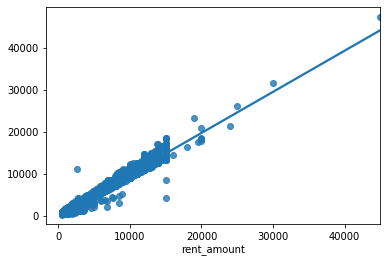

In [108]:
sns.regplot(Y,Y_predict2)